In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from tensorflow import keras 

## Data Preparation

In [2]:
model = lambda x: x * 2.0 + 1.0
x_train = np.array([0, 1])
y_train = model(x_train)
x_test = np.array([2,3,4])
y_test = model(x_test)

#x_train = x_train.reshape(-1,1)
#y_train = y_train.reshape(-1,1)
#x_test = x_test.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

## Function Definitinos

In [3]:
wb = keras.models.Sequential()
wb.add(keras.layers.Dense(1,input_shape=(1,)))
wb.compile('SGD', 'mse')

2022-01-24 00:48:53.341723: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-24 00:48:53.342210: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-24 00:48:53.344396: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# Training and Testing

In [4]:
N_epoch = 1000
hist = wb.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=N_epoch, verbose=0)

2022-01-24 00:48:54.772780: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-24 00:48:54.773284: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3599995000 Hz


In [5]:
w_tr, b_tr = wb.get_weights()
print(f"w={w_tr[0,0]:.2}, b={b_tr[0]:.2}")

w=2.0, b=1.0


Text(0, 0.5, 'J')

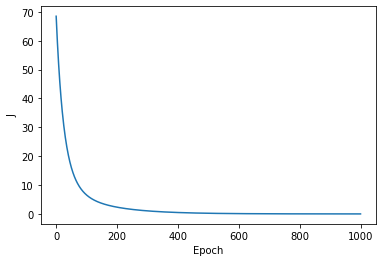

In [6]:
plt.plot(hist.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("J")

In [7]:
%time wb.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=0)
%time wb.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)
%time wb.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, verbose=0)

CPU times: user 4.63 s, sys: 3.88 s, total: 8.5 s
Wall time: 1.2 s
CPU times: user 46.7 s, sys: 49.6 s, total: 1min 36s
Wall time: 12.1 s
CPU times: user 9min 18s, sys: 9min 29s, total: 18min 48s
Wall time: 2min 24s
